# Social Insights
> Proyecto realizado para el reto: BBVA Contigo del Hackathon BBVA 2021

In [5]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Recolección de datos

La recolección de tweets se realizó haciendo uso de [snscrape](https://github.com/JustAnotherArchivist/snscrape). 
*Importante:* Para hacer uso de la librería es necesario tener Python 3.8 o superior.

In [ ]:
# !pip install git+https://github.com/JustAnotherArchivist/snscrape.git

import snscrape.modules.twitter as sntwitter  

In [35]:
servicios = ["tarjeta de crédito","tarjeta de débito","crédito","cuenta bancaria","nómina","pensión","cuenta de ahorro","seguro","invertir"]
maxExtraer = 5000

In [ ]:
df_servicios = []

for s in servicios:
    tweets_list = []

    data = s + ' since:2021-10-22 until:2021-10-23'
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(data).get_items()):
        if i>maxExtraer:
            break
        tweets_list.append([tweet.date, tweet.content, tweet.user.location])

    df_name = "df_" + s
    df_name = pd.DataFrame(tweets_list, columns=['Fecha','Contenido','Ubicacion'])
    df_name["Servicio"]= s

    df_servicios.append(df_name)

In [ ]:
df_Twitter = pd.concat(df_servicios)
df_Twitter["Red_Social"] = "Twitter"
df_Twitter.reset_index(drop=True, inplace=True)
df_Twitter

,Fecha,Contenido,Ubicacion,Servicio,Red_Social
0,2021-10-22 23:59:36+00:00,"@AngelMHZ Ah yo nunca tengo, pero mágicamente ...",National District,tarjeta de crédito,Twitter
1,2021-10-22 23:56:57+00:00,#newvideoinmychannel | ¿Cómo manejo mi tarjeta...,Minnesota,tarjeta de crédito,Twitter
2,2021-10-22 23:56:40+00:00,Murió mí billetera\nSucumbió mí tarjeta de cré...,Argentina,tarjeta de crédito,Twitter
3,2021-10-22 23:55:34+00:00,"Si tengo tarjeta de credito de banamex, alguie...","Tampico | Mante, MX",tarjeta de crédito,Twitter
4,2021-10-22 23:54:50+00:00,"sí, también en lo de la tarjeta de crédito.",el abismo,tarjeta de crédito,Twitter
...,...,...,...,...,...
21931,2021-10-22 00:01:02+00:00,@ErickVil5 Eso es verdad. No invierten en tecn...,,invertir,Twitter
21932,2021-10-22 00:00:53+00:00,Aprovecha grandes ofertas y date el gusto de e...,Balderas 144 Col. Centro. CDMX,invertir,Twitter
21933,2021-10-22 00:00:23+00:00,"@adoquin2001 Y no, no puedes ahorrar e inverti...",,invertir,Twitter
21934,2021-10-22 00:00:08+00:00,#ModoIrreverente #JuanDiegoGómez #InvertirMejo...,Colombia,invertir,Twitter


In [ ]:
df_Twitter.to_csv('Datasets/df_socialMedia_raw.csv', sep=',', index=False)

## Limpieza y tratamiento

In [14]:
df_socialMedia_clean = df_Twitter.dropna()
filter_ubicacion = df_socialMedia_clean['Ubicacion'].str.lower().str.contains('m.xico|espa.a|colombia')
df_socialMedia_clean = df_socialMedia_clean[filter_ubicacion]
df_socialMedia_clean.head()

,Fecha,Contenido,Ubicacion,Servicio,Red_Social
6,2021-10-22 23:52:52+00:00,@MundarayZair @ClaroColombia En España (soy co...,"Valencia, España",tarjeta de crédito,Twitter
31,2021-10-22 23:00:08+00:00,PAGO POR MEDIO DE PayU para seguridad en tu co...,"Bogotá, Colombia",tarjeta de crédito,Twitter
32,2021-10-22 23:00:01+00:00,Tarjeta de crédito: ¿Cuándo te conviene usarla...,México,tarjeta de crédito,Twitter
34,2021-10-22 22:57:20+00:00,Fui al Citibanamex por una tarjeta de crédito ...,"Tabasco, México",tarjeta de crédito,Twitter
55,2021-10-22 22:28:40+00:00,Me da miedo usar mi tarjeta de crédito 😵‍💫,Mexico,tarjeta de crédito,Twitter


In [ ]:
df_socialMedia_clean.to_csv('Datasets/df_socialMedia_clean.csv', sep=',', index=False)

## Procesamiento del lenguaje natural 

In [11]:
df_socialMedia_clean = pd.read_csv('https://raw.githubusercontent.com/alondraSanchezM/Social-Insights/main/Datasets/df_socialMedia_clean.csv?token=AMZP7UZUSM3BWUUOZ7ITF3TBPW3JI');

In [16]:
#Usando patrones Regrex
data = df_socialMedia_clean['Contenido']
data = data.str.lower() # convertimos a minusculas
data = data.str.strip() # eliminamos espacios que sobren en los extremos
data = data.str.replace('\d', '') # cambiamos caracteres numericos por espacios vacios
data = data.str.replace('\\n', '') # cambiamos salto de linea por espacios
data = data.str.replace('[^\w\s]', '') # reemplazamos caracteres que no sean ni alfanuméricos ni espacios o tabs por espacios vacíos
data = data.dropna() # quitamos NaNs
data

6        mundarayzair clarocolombia en españa soy comun...
31       pago por medio de payu para seguridad en tu co...
32       tarjeta de crédito cuándo te conviene usarla y...
34       fui al citibanamex por una tarjeta de crédito ...
55                 me da miedo usar mi tarjeta de crédito 
                               ...                        
21890                                 violettasoyyo te amo
21900    _ajaytuque hay una ventaja y es que a la gente...
21913    soy_tanuki pumpkin_eves bien el asunto no es n...
21927    no encuentro un buen disfraz en el que no teng...
21934    modoirreverente juandiegogómez invertirmejor l...
Name: Contenido, Length: 1986, dtype: object

In [17]:
#tokenización: construimos un objeto Text con nuestros datos y separamos cada oración en palabras para despues sumarlas.
tokenized = data.apply(nltk.word_tokenize)
all_words = tokenized.sum()
text = nltk.Text(all_words)
text

<Text: mundarayzair clarocolombia en españa soy comunitario con pasaporte...>

### Exploración de contexto

In [18]:
text.concordance('crédito', lines=20)

Displaying 20 of 517 matches:
o que no podía darme una tarjeta de crédito porque soy latino y podía irme sin 
ad en tu comprapagos con tarjeta de crédito recibimos todas las tarjetasincluíd
puerta httpstcournmhkehz tarjeta de crédito cuándo te conviene usarla y en que 
i al citibanamex por una tarjeta de crédito pa comprar los boletos pa los strok
oles me da miedo usar mi tarjeta de crédito se siente tan bien cancelar una tar
te tan bien cancelar una tarjeta de crédito comprar ropa para entrenar es la me
ndo que acabó de usar su tarjeta de crédito en gastos innecesarios no me envía 
 me envía una foto de su tarjeta de crédito por las dos caras pago por medio de
ad en tu comprapagos con tarjeta de crédito recibimos todas las tarjetasincluíd
 que alguien me quite la tarjeta de crédito tiembla tarjeta de crédito ya hay m
rjeta de crédito tiembla tarjeta de crédito ya hay mercancía bonita de red de t
tcoirmycype hoy llegó la tarjeta de crédito y a felo capitalista hay que dejarl
lo bajo ll

In [19]:
text.concordance('invertir', lines=20)

Displaying 20 of 392 matches:
es damos crédito así no tienen que invertir ni madres den sueldos de hambre y 
 no basta con tener buena nómina e invertir en buenos refuerzos también hay qu
o bolivia atrae a gigantes rusos a invertir en su desarrollo económico httpstc
t ojalá y así de bien me vaya para invertir en la bolsa de valores mexicana ht
no tienen equipo para nada hay que invertir para intentar ganar algo no tienen
n de verdad aprender a valorarme e invertir en mí ha sido de mucha ayuda en es
 ganador por cierto que triste que invertir en su banco y en meses sólo den pe
 grupo aval alardiyauwu momento de invertir en sudaderas invertir en dolar me 
u momento de invertir en sudaderas invertir en dolar me acaba de salvar meses 
i de hecho en yugi no vale la pena invertir en decks meta si te puedes esperar
mos y jugadores libres ya no van a invertir lo que se invertia antes alepadill
e el patrón se había arriesgado en invertir y por eso estaba bien que ganará v
rar en bancos es un hu

In [20]:
text.concordance('nómina', lines=20)

Displaying 20 of 288 matches:
ero mencionó que estaba resuelto la nómina educativa y no les han pagado hicie
o solucionatuvida solicitadesdecasa nómina httpstcoczswyblzot además no sé en 
desde el sábado por su problema con nómina y me dijeron en todas que en hrs má
en efectivo hasta los que ingresé a nómina comencé mi relación con el sat y co
ere aviadores insiste en tarjeta de nómina httpstcokyxkduczy httpstcoqlvpwmpm 
pleo ingresosolidario subsidio a la nómina y apoyo a entes territoriales que i
valoraanalitik ang_bgomez tiene más nómina que el psg bieitorubido casi toda l
orubido casi toda la prensa está en nómina de estos delincuentes del gobierno 
es del gobierno economíacréditos de nómina son buenos o malosdescubre aquí los
 con el trabajo no te metasy con la nómina jamás se juegamanzanillocodo codito
ncia es cambiar tu dignidad por una nómina fija y abultada hay que comer es ci
anco fue una mala decisión meter mi nómina aquí es una banco que no es un banc
ajaaa por eso no te cr

In [21]:
text.similar('tarjeta')

nómina cuenta pensión forma tarjetas estado la crédito línea calidad
las más años caída reunión medida final edad nomina función


In [22]:
text.similar('pensión')

nómina cuenta crédito las la tarjeta invertir gente salud edad vida
más experiencia años verdad liga impuestos cámara basura nomina


In [23]:
text.similar('débito')

crédito que nómina invertir calidad credito salud manejo ahorro
pensión edad nomina fútbol pensiones de pagar pago las el a


In [24]:
text.similar('nómina')

pensión nomina crédito cuenta tarjeta verdad que gente seguro ahorro
calidad la el forma atención experiencia persona deuda ley basura


In [25]:
text.collocations()

cuenta bancaria; recibimos todas; entrega inmediata; todas las; mejor
precio; las tarjetasincluída; crédito recibimos; comprapagos con;
seguro que; payu para; por medio; para seguridad; pago por; todos los;
adultos mayores; por favor; estoy seguro; con tarjeta; estudios
legislativos; para invertir


### Anáisis estadístico

In [26]:
stop_words = stopwords.words('spanish')
all_words_stop = [word for word in all_words if word not in stop_words]
freq_dist = nltk.FreqDist(all_words_stop)

In [27]:
freq_dist.most_common(15)

[('crédito', 517),
 ('seguro', 400),
 ('invertir', 392),
 ('tarjeta', 318),
 ('si', 308),
 ('nómina', 288),
 ('pensión', 171),
 ('mejor', 128),
 ('cuenta', 128),
 ('dinero', 98),
 ('q', 90),
 ('pago', 80),
 ('solo', 80),
 ('nomina', 77),
 ('tener', 75)]

Text(0.5, 1.0, 'Frecuencia de las 15 palabras más comunes')

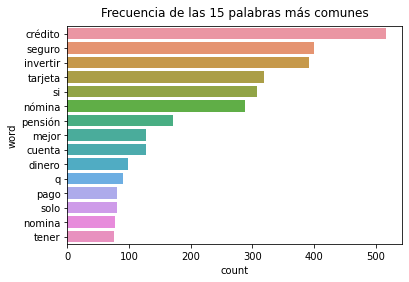

In [30]:
most_common_15 = pd.DataFrame(freq_dist.most_common(15), columns=['word', 'count'])

fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(data=most_common_15, y='word', x='count', ax=ax)
ax.set_title('Frecuencia de las 15 palabras más comunes', pad=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


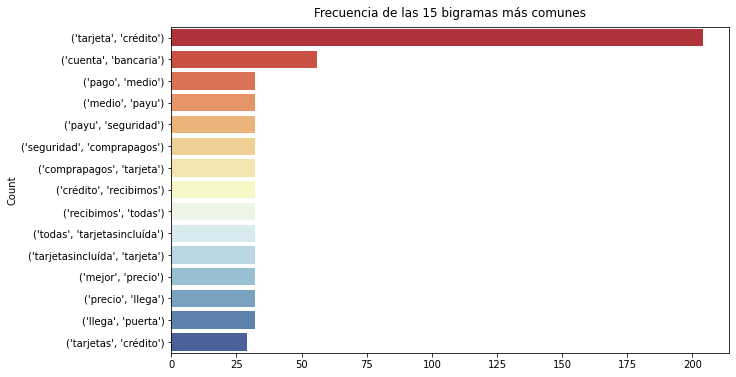

In [31]:
text = nltk.Text(all_words_stop)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(15))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 1].astype(int), most_common_20[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 15 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x')

### WordCloud

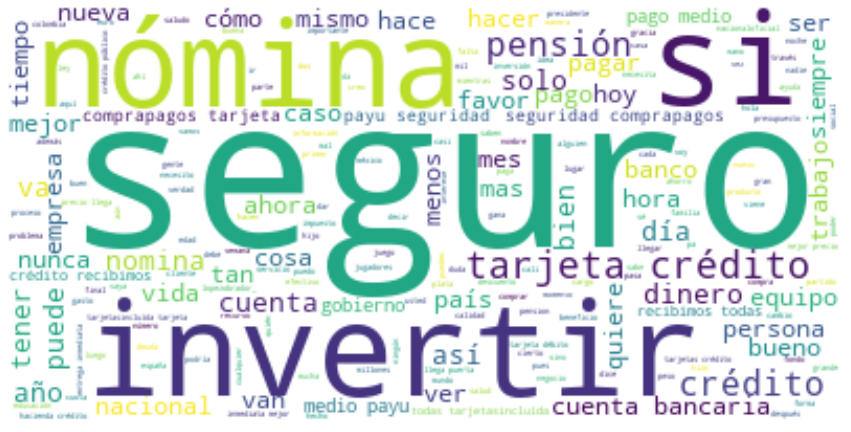

In [34]:
wordcloud = WordCloud(max_font_size=100, background_color='white').generate(' '.join(all_words_stop))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## División de datasets para consumo en Amazon Comprehend

In [71]:
df_socialMedia_clean = pd.read_csv('https://raw.githubusercontent.com/alondraSanchezM/Social-Insights/main/Datasets/df_socialMedia_clean.csv?token=AMZP7U5DJTWOOHA32OHI2OTBPYAJW');
df_socialMedia_clean = df_socialMedia_clean.drop(['Fecha', 'Ubicacion', 'Red_Social'], axis=1)
var = ["tarjetaCredito","tarjetaDebito","credito","cuentaBancaria","nomina","pension","cuentaAhorro","seguro","invertir"]

In [72]:
for s, v in zip(servicios, var):
    df_name = df_socialMedia_clean[df_socialMedia_clean.Servicio == s]
    df_name = df_name.drop(['Servicio'], axis=1)

    ruta = "Datasets/PorServicio/df_" + v + ".csv"
    df_name.to_csv(ruta, sep=',', index=False, header=False)